<h1>Inception v3 - Computer Vision: Assumed Pulmonary Tuberculosis Recognition using on Postero-Anterior Chest Radiographs</h1>

Transfer learning a pretrained Inception V3 in classifying "assumed" Pulmonary Tuberculosis on 600 images. The classification layer is a neural network compiled with three different Stochastic Optimization Algorithm. The model was trained in a gaming laptop ASUS RoG GL553VD

<ul>
    <li>Image Processing and Data Augmentation</li>
    <li>Achieved 88% accuracy in diagnosing Assumed Pulmonary
        Tuberculosis using Inception V3 and Adam optimizer</li>
</ul>

In [1]:
# Inception v3
# Code snippets taken from Keras Documentation, LearnOpenCV, Kaggle 01/05/19

# check the version of Keras
import keras
keras.__version__

# check if Keras is running on gpu
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

# check devices used by TensorFlow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13899483749314339490
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7524913989834601763
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13523914215208648478
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3569876992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8312086173841294693
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
# explore the Dataset
import numpy as np
import pandas as pd
import os
from IPython.display import display
from PIL import Image
from skimage.transform import resize
from random import shuffle

list_paths = []
for subdir, dirs, files in os.walk("./Dataset/"):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file
        list_paths.append(filepath)
print(*list_paths, sep = "\n")

./Dataset/Test/normal/R90_MCUCXR_0046_0.png
./Dataset/Test/normal/R270_CHNCXR_0119_0.png
./Dataset/Test/normal/R180_CHNCXR_0326_0.png
./Dataset/Test/normal/R270_CHNCXR_0159_0.png
./Dataset/Test/normal/R180_CHNCXR_0083_0.png
./Dataset/Test/normal/R270_MCUCXR_0102_0.png
./Dataset/Test/normal/R180_CHNCXR_0280_0.png
./Dataset/Test/normal/R270_CHNCXR_0062_0.png
./Dataset/Test/normal/R180_CHNCXR_0077_0.png
./Dataset/Test/normal/R180_MCUCXR_0102_0.png
./Dataset/Test/normal/R180_MCUCXR_0069_0.png
./Dataset/Test/normal/CHNCXR_0191_0.png
./Dataset/Test/normal/CHNCXR_0203_0.png
./Dataset/Test/normal/R270_MCUCXR_0040_0.png
./Dataset/Test/normal/R270_MCUCXR_0101_0.png
./Dataset/Test/normal/R180_CHNCXR_0276_0.png
./Dataset/Test/normal/R180_MCUCXR_0101_0.png
./Dataset/Test/normal/R270_CHNCXR_0295_0.png
./Dataset/Test/normal/CHNCXR_0289_0.png
./Dataset/Test/normal/R270_CHNCXR_0095_0.png
./Dataset/Test/normal/R180_CHNCXR_0179_0.png
./Dataset/Test/normal/CHNCXR_0110_0.png
./Dataset/Test/normal/CHNCXR_02

./Dataset/Train/positive/CHNCXR_0625_1.png
./Dataset/Train/positive/CHNCXR_0384_1.png
./Dataset/Train/positive/R180_CHNCXR_0591_1.png
./Dataset/Train/positive/R180_CHNCXR_0465_1.png
./Dataset/Train/positive/R90_CHNCXR_0456_1.png
./Dataset/Train/positive/R90_CHNCXR_0507_1.png
./Dataset/Train/positive/R180_CHNCXR_0502_1.png
./Dataset/Train/positive/CHNCXR_0474_1.png
./Dataset/Train/positive/MCUCXR_0369_1.png
./Dataset/Train/positive/R180_MCUCXR_0140_1.png
./Dataset/Train/positive/R180_CHNCXR_0496_1.png
./Dataset/Train/positive/R270_CHNCXR_0644_1.png
./Dataset/Train/positive/R180_CHNCXR_0372_1.png
./Dataset/Train/positive/CHNCXR_0421_1.png
./Dataset/Train/positive/MCUCXR_0108_1.png
./Dataset/Train/positive/R180_CHNCXR_0418_1.png
./Dataset/Train/positive/CHNCXR_0584_1.png
./Dataset/Train/positive/R180_CHNCXR_0651_1.png
./Dataset/Train/positive/MCUCXR_0140_1.png
./Dataset/Train/positive/R180_CHNCXR_0337_1.png
./Dataset/Train/positive/R90_CHNCXR_0375_1.png
./Dataset/Train/positive/R270_CHNCX

In [3]:
# shuffle the Training Set
list_train = [filepath for filepath in list_paths if "Train/" in filepath]
shuffle(list_train)
list_test = [filepath for filepath in list_paths if "Test/" in filepath]

# identify classes via OS 
list_train = list_train
list_test = list_test
index = [os.path.basename(filepath) for filepath in list_test]
list_classes = list(set([os.path.dirname(filepath).split(os.sep)[-1] for filepath in list_paths if "Train" in filepath]))

# display classes
print(list_classes)

['positive', 'normal']


<h3>Data Preprocessing and Augmentation</h3>

In [4]:
ROWS=299
COLS=299

# Data Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation (Done manually via OpenCV)
# Rescale pixels
# Batch size can be chosen between 16, 32, 64, 128
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('Dataset/Train/', 
                                                 target_size=(ROWS, COLS), 
                                                 batch_size = 32, 
                                                 class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('Dataset/Test/', 
                                            target_size=(ROWS, COLS), 
                                            batch_size = 32, 
                                            class_mode='binary')

Found 2432 images belonging to 2 classes.
Found 608 images belonging to 2 classes.


<h3>Import Inception V3</h3>

In [5]:
# Create the model

from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications
input_shape = (ROWS, COLS, 3)

base_model = applications.InceptionV3(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (ROWS, COLS,3))

# Check the trainable status of the individual layers
# freeze all layers until first inception block
for layer in base_model.layers[:18]:
   layer.trainable = False
for layer in base_model.layers[18:]:
   layer.trainable = True

# print trainable layers
for layer in base_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f2e135b5cc0> False
<keras.layers.convolutional.Conv2D object at 0x7f2e135b5748> False
<keras.layers.normalization.BatchNormalization object at 0x7f2e135b59e8> False
<keras.layers.core.Activation object at 0x7f2e135b57f0> False
<keras.layers.convolutional.Conv2D object at 0x7f2e135a3390> False
<keras.layers.normalization.BatchNormalization object at 0x7f2e1350bda0> False
<keras.layers.core.Activation object at 0x7f2e134d6518> False
<keras.layers.convolutional.Conv2D object at 0x7f2e1345d588> False
<keras.layers.normalization.BatchNormalization object at 0x7f2e134264a8> False
<keras.layers.core.Activation object at 0x7f2d877d1e80> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2d877a0b00> False
<keras.layers.convolutional.Conv2D object at 0x7f2d877a06a0> False
<keras.layers.normalization.BatchNormalization object at 0x7f2d8768cdd8> False
<keras.layers.core.Activation object at 0x7f2d8768ceb8> False
<keras.layers.convolutional.Conv

<h3>Assign Optimizer</h3>

In [6]:
# add the classifier to the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# choose learning rate between (0.1 ... 0.0003)
learning_rate = 0.3

# OPTIMIZERS (ADAM, RMSprop, SGD + Nesterov)
# adjust parameters 
optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1.0, decay=0.0, amsgrad=False)
# optimizer = keras.optimizers.RMSprop(lr=learning_rate, rho=0.9, epsilon=None, decay=0.0)
# optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.9, decay=0.0, nesterov=True)

# compile
model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizer,
              metrics = ['accuracy'])

# print model summary and trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 23,901,985
Trainable params: 23,695,281
Non-trainable params: 206,704
_________________________________________________________________


<h3>First Training</h3>

In [7]:
# specify callbacks
file_path="ADAM_03_1.h5"

checkpoint = ModelCheckpoint(file_path,
                             monitor = 'val_acc', 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = 'max')

early = EarlyStopping(monitor = "val_loss", 
                      mode = "min", 
                      patience = 7)

callbacks_list = [checkpoint, early]

In [8]:
%%time
train_one = model.fit_generator(training_set,
                              steps_per_epoch = len(training_set),
                              epochs = 70, 
                              shuffle = True, 
                              verbose = True,
                              validation_data = test_set,
                              validation_steps = len(test_set),
                              callbacks = callbacks_list)

Epoch 1/70
76/76 [==============================] - 112s 1s/step - loss: 0.4883 - acc: 0.7615 - val_loss: 0.6477 - val_acc: 0.6414

Epoch 00001: val_acc improved from -inf to 0.64145, saving model to ADAM_03_1.h5
Epoch 2/70
76/76 [==============================] - 95s 1s/step - loss: 0.3151 - acc: 0.8692 - val_loss: 0.7095 - val_acc: 0.6908

Epoch 00002: val_acc improved from 0.64145 to 0.69079, saving model to ADAM_03_1.h5
Epoch 3/70
76/76 [==============================] - 95s 1s/step - loss: 0.1995 - acc: 0.9252 - val_loss: 0.8889 - val_acc: 0.6250

Epoch 00003: val_acc did not improve from 0.69079
Epoch 4/70
76/76 [==============================] - 96s 1s/step - loss: 0.1495 - acc: 0.9420 - val_loss: 1.7257 - val_acc: 0.5033

Epoch 00004: val_acc did not improve from 0.69079
Epoch 5/70
76/76 [==============================] - 95s 1s/step - loss: 0.1230 - acc: 0.9502 - val_loss: 1.4536 - val_acc: 0.5230

Epoch 00005: val_acc did not improve from 0.69079
Epoch 6/70
76/76 [===========

<h3>Second Training with Shuffled Dataset</h3>

In [9]:
# Create the model

from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications
input_shape = (ROWS, COLS, 3)

base_model = applications.InceptionV3(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (ROWS, COLS,3))

# Check the trainable status of the individual layers
# freeze all layers until first inception block
for layer in base_model.layers[:18]:
   layer.trainable = False
for layer in base_model.layers[18:]:
   layer.trainable = True

# print trainable layers
for layer in base_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f2c4d4762b0> False
<keras.layers.convolutional.Conv2D object at 0x7f2c4d476a90> False
<keras.layers.normalization.BatchNormalization object at 0x7f2c44796780> False
<keras.layers.core.Activation object at 0x7f2c447962b0> False
<keras.layers.convolutional.Conv2D object at 0x7f2c44c1a940> False
<keras.layers.normalization.BatchNormalization object at 0x7f2c44781748> False
<keras.layers.core.Activation object at 0x7f2c4d476588> False
<keras.layers.convolutional.Conv2D object at 0x7f2c44cd8e10> False
<keras.layers.normalization.BatchNormalization object at 0x7f2c44549a58> False
<keras.layers.core.Activation object at 0x7f2c4ac000f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2d68be4c18> False
<keras.layers.convolutional.Conv2D object at 0x7f2d68be4908> False
<keras.layers.normalization.BatchNormalization object at 0x7f2d68aaecf8> False
<keras.layers.core.Activation object at 0x7f2d68aaefd0> False
<keras.layers.convolutional.Conv

In [10]:
# add the classifier to the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# Choose the different optimizers (ADAM, RMSprop, SGD + Nesterov)
# adjust parameters 
optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1.0, decay=0.0, amsgrad=False)
# optimizer = keras.optimizers.RMSprop(lr=learning_rate, rho=0.9, epsilon=None, decay=0.0)
# optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.9, decay=0.0, nesterov=True)

# compile
model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizer,
              metrics = ['accuracy'])

# print model summary and trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1025      
Total params: 23,901,985
Trainable params: 23,695,281
Non-trainable params: 206,704
_________________________________________________________________


In [11]:
# SECOND TRAINING with New Dataset
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('Dataset2/Train/', 
                                                 target_size=(ROWS, COLS), 
                                                 batch_size = 32, 
                                                 class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('Dataset2/Test/', 
                                            target_size=(ROWS, COLS), 
                                            batch_size = 32, 
                                            class_mode='binary')

Found 2432 images belonging to 2 classes.
Found 608 images belonging to 2 classes.


In [12]:
# SECOND CALLBACKS
# specify callbacks
file_path="ADAM_03_2.h5"

checkpoint = ModelCheckpoint(file_path,
                             monitor = 'val_acc', 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = 'max')

early = EarlyStopping(monitor = "val_loss", 
                      mode = "min", 
                      patience = 7)

callbacks_list = [checkpoint, early]

In [13]:
%%time
train_two = model.fit_generator(training_set,
                              steps_per_epoch = len(training_set),
                              epochs = 70, 
                              shuffle = True, 
                              verbose = True,
                              validation_data = test_set,
                              validation_steps = len(test_set),
                              callbacks = callbacks_list)

Epoch 1/70
76/76 [==============================] - 114s 2s/step - loss: 0.4942 - acc: 0.7562 - val_loss: 0.5730 - val_acc: 0.6776

Epoch 00001: val_acc improved from -inf to 0.67763, saving model to ADAM_03_2.h5
Epoch 2/70
76/76 [==============================] - 96s 1s/step - loss: 0.2867 - acc: 0.8857 - val_loss: 0.4002 - val_acc: 0.8273

Epoch 00002: val_acc improved from 0.67763 to 0.82730, saving model to ADAM_03_2.h5
Epoch 3/70
76/76 [==============================] - 96s 1s/step - loss: 0.2166 - acc: 0.9157 - val_loss: 0.4986 - val_acc: 0.7599

Epoch 00003: val_acc did not improve from 0.82730
Epoch 4/70
76/76 [==============================] - 96s 1s/step - loss: 0.1734 - acc: 0.9342 - val_loss: 2.2159 - val_acc: 0.4901

Epoch 00004: val_acc did not improve from 0.82730
Epoch 5/70
76/76 [==============================] - 96s 1s/step - loss: 0.1503 - acc: 0.9437 - val_loss: 0.6066 - val_acc: 0.6628

Epoch 00005: val_acc did not improve from 0.82730
Epoch 6/70
76/76 [===========

In [14]:
print(train_one.history)
type(train_one.history)

{'val_loss': [0.6477499180718472, 0.7095371735723395, 0.8888998408066598, 1.725652625686244, 1.4536086383618807, 0.5525468454549187, 0.7158355336440237, 1.943186182724802, 0.6645598301762029, 1.809120027642501, 0.5892480831397208, 2.0319552860761942, 1.226817498081609], 'val_acc': [0.6414473684210527, 0.6907894736842105, 0.625, 0.5032894736842105, 0.5230263157894737, 0.756578947368421, 0.7023026315789473, 0.5131578947368421, 0.78125, 0.5904605263157895, 0.7845394736842105, 0.5460526315789473, 0.6101973684210527], 'loss': [0.48827968145671646, 0.31506577241969735, 0.19952731270735202, 0.14946933312488622, 0.12302462352243693, 0.09899564811616744, 0.10109195888875738, 0.053736851749770144, 0.05274657882584602, 0.027417344129246072, 0.03700097984332579, 0.05015923760105292, 0.057469400701321366], 'acc': [0.7615131578947368, 0.8692434210526315, 0.9251644736842105, 0.9420230263157895, 0.9502467105263158, 0.9638157894736842, 0.9646381578947368, 0.9823190789473685, 0.9827302631578947, 0.99177

dict

In [1]:
train_one = {'val_loss': [0.6477499180718472, 0.7095371735723395, 0.8888998408066598, 1.725652625686244, 1.4536086383618807, 0.5525468454549187, 0.7158355336440237, 1.943186182724802, 0.6645598301762029, 1.809120027642501, 0.5892480831397208, 2.0319552860761942, 1.226817498081609], 'val_acc': [0.6414473684210527, 0.6907894736842105, 0.625, 0.5032894736842105, 0.5230263157894737, 0.756578947368421, 0.7023026315789473, 0.5131578947368421, 0.78125, 0.5904605263157895, 0.7845394736842105, 0.5460526315789473, 0.6101973684210527], 'loss': [0.48827968145671646, 0.31506577241969735, 0.19952731270735202, 0.14946933312488622, 0.12302462352243693, 0.09899564811616744, 0.10109195888875738, 0.053736851749770144, 0.05274657882584602, 0.027417344129246072, 0.03700097984332579, 0.05015923760105292, 0.057469400701321366], 'acc': [0.7615131578947368, 0.8692434210526315, 0.9251644736842105, 0.9420230263157895, 0.9502467105263158, 0.9638157894736842, 0.9646381578947368, 0.9823190789473685, 0.9827302631578947, 0.9917763157894737, 0.9913651315789473, 0.984375, 0.9806743421052632]}

In [15]:
print(train_two.history)

{'val_loss': [0.5730054268711492, 0.40022001768413346, 0.49862248646585566, 2.2158631588283337, 0.606640017346332, 1.1681530287391262, 1.3504099939998828, 0.32096242277245773, 0.4320551356986949, 1.2485686038669788, 1.2760654295745648, 1.694965384508434, 1.4494007731738843, 2.091868808394984, 0.5443907207564304], 'val_acc': [0.6776315789473685, 0.8273026315789473, 0.7598684210526315, 0.4901315789473684, 0.662828947368421, 0.6217105263157895, 0.6101973684210527, 0.881578947368421, 0.8240131578947368, 0.5641447368421053, 0.5888157894736842, 0.6036184210526315, 0.5838815789473685, 0.5509868421052632, 0.8240131578947368], 'loss': [0.49421541216342074, 0.2867289018866263, 0.21664671085186696, 0.17337536233428277, 0.15027069739115081, 0.09316904889419675, 0.06219282478253406, 0.06600352507819862, 0.05024231240263601, 0.056858182946023975, 0.09501709806040469, 0.05542563685326298, 0.038209642580783874, 0.02261232311100589, 0.023994821005448773], 'acc': [0.7561677631578947, 0.8856907894736842,

In [2]:
train_two = {'val_loss': [0.5730054268711492, 0.40022001768413346, 0.49862248646585566, 2.2158631588283337, 0.606640017346332, 1.1681530287391262, 1.3504099939998828, 0.32096242277245773, 0.4320551356986949, 1.2485686038669788, 1.2760654295745648, 1.694965384508434, 1.4494007731738843, 2.091868808394984, 0.5443907207564304], 'val_acc': [0.6776315789473685, 0.8273026315789473, 0.7598684210526315, 0.4901315789473684, 0.662828947368421, 0.6217105263157895, 0.6101973684210527, 0.881578947368421, 0.8240131578947368, 0.5641447368421053, 0.5888157894736842, 0.6036184210526315, 0.5838815789473685, 0.5509868421052632, 0.8240131578947368], 'loss': [0.49421541216342074, 0.2867289018866263, 0.21664671085186696, 0.17337536233428277, 0.15027069739115081, 0.09316904889419675, 0.06219282478253406, 0.06600352507819862, 0.05024231240263601, 0.056858182946023975, 0.09501709806040469, 0.05542563685326298, 0.038209642580783874, 0.02261232311100589, 0.023994821005448773], 'acc': [0.7561677631578947, 0.8856907894736842, 0.9157072368421053, 0.9342105263157895, 0.9436677631578947, 0.969983552631579, 0.9806743421052632, 0.975328947368421, 0.9823190789473685, 0.9786184210526315, 0.967516447368421, 0.9827302631578947, 0.9880756578947368, 0.9921875, 0.990953947368421]}


<h3>Data Visualization</h3>

In [3]:
# visualize performance
# first training
acc1 = train_one['acc']
val_acc1 = train_one['val_acc']
loss1 = train_one['loss']
val_loss1 = train_one['val_loss']

# second training
acc2 = train_two['acc']
val_acc2 = train_two['val_acc']
loss2 = train_two['loss']
val_loss2 = train_two['val_loss']

epochs1 = range(len(acc1))
epochs2 = range(len(acc2))

/home/ted/.local/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


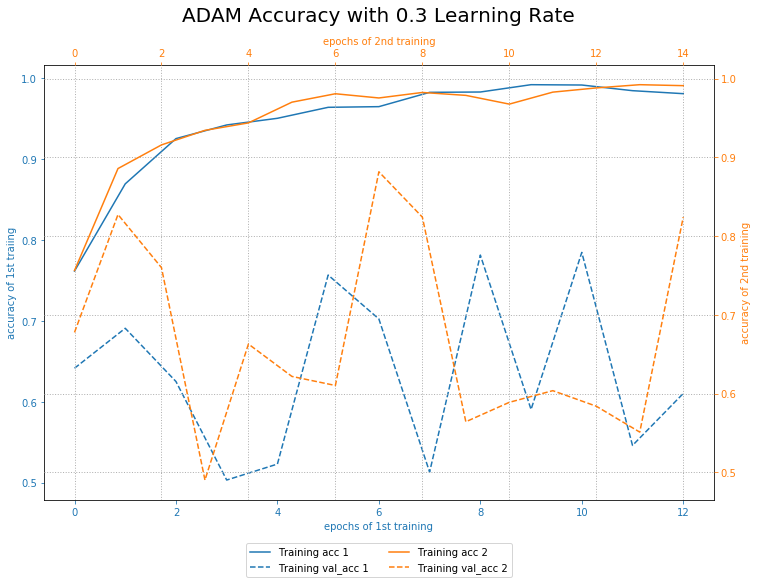

In [5]:
# ACCURACY
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax2=fig.add_subplot(111, frame_on=False)

line_labels = ['Training acc 1', 'Training val_acc 1', 'Training acc 2', 'Training val_acc 2']
l1 = ax.plot(epochs1, acc1, color="C0")
l2 = ax.plot(epochs1, val_acc1, '--', color="C0")
ax.set_xlabel("epochs of 1st training", color="C0")
ax.set_ylabel("accuracy of 1st traiing", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

l3 = ax2.plot(epochs2, acc2, color="C1")
l4 = ax2.plot(epochs2, val_acc2,  '--',color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('epochs of 2nd training', color="C1") 
ax2.set_ylabel('accuracy of 2nd training', color="C1")
plt.grid(linestyle=':', linewidth=1)


ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

fig.legend([l1, l2, l3, l4],     
           labels=line_labels,   
           loc = 'lower center',
           borderaxespad=0.1, 
           ncol = 2
          )

plt.text(0.5, 1.1, 'ADAM Accuracy with 0.3 Learning Rate',
         horizontalalignment='center',
         fontsize=20,
         transform = ax2.transAxes)

fig.savefig('ADAM_03_acc.png')


plt.show()

/home/ted/.local/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


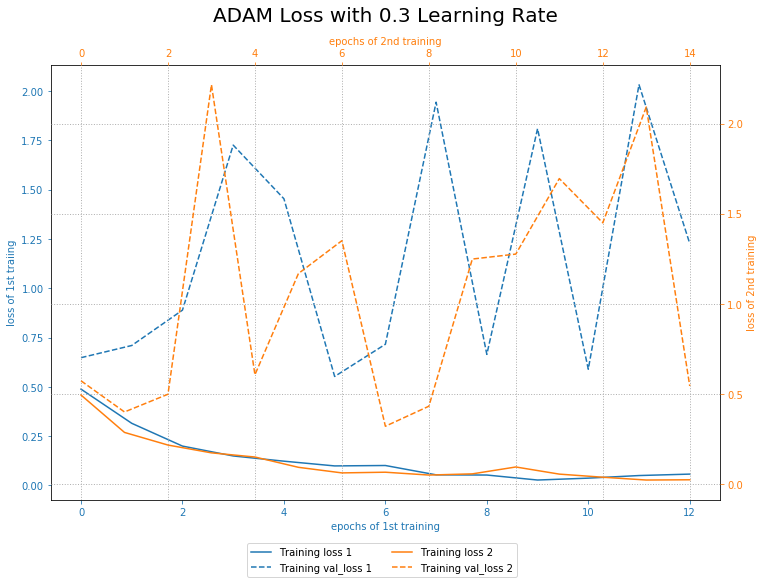

In [6]:
# LOSS
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax2=fig.add_subplot(111, frame_on=False)

line_labels = ['Training loss 1', 'Training val_loss 1', 'Training loss 2', 'Training val_loss 2']
l1 = ax.plot(epochs1, loss1, color="C0")
l2 = ax.plot(epochs1, val_loss1, '--', color="C0")
ax.set_xlabel("epochs of 1st training", color="C0")
ax.set_ylabel("loss of 1st traiing", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

l3 = ax2.plot(epochs2, loss2, color="C1")
l4 = ax2.plot(epochs2, val_loss2,  '--',color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('epochs of 2nd training', color="C1") 
ax2.set_ylabel('loss of 2nd training', color="C1")
plt.grid(linestyle=':', linewidth=1)


ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

fig.legend([l1, l2, l3, l4],     
           labels=line_labels,   
           loc = 'lower center',
           borderaxespad=0.1, 
           ncol = 2
          )

plt.text(0.5, 1.1, 'ADAM Loss with 0.3 Learning Rate',
         horizontalalignment='center',
         fontsize=20,
         transform = ax2.transAxes)

fig.savefig('ADAM_03_loss.png')


plt.show()